Version 1.0.1

# Pandas basics 

In [1]:
import pandas as pd
import numpy as np
import os
import data
import matplotlib.pyplot as plt
%matplotlib inline 

## Data Exploration

In [2]:
DATA_FOLDER = data.READ_ONLY_ROOT

transactions    = pd.read_csv(os.path.join(DATA_FOLDER, 'sales_train.csv'))
items           = pd.read_csv(os.path.join(DATA_FOLDER, 'items.csv'))
item_categories = pd.read_csv(os.path.join(DATA_FOLDER, 'item_categories.csv'))
shops           = pd.read_csv(os.path.join(DATA_FOLDER, 'shops.csv'))

In [3]:
transactions.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


In [4]:
item_categories.head()

,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1
2,Аксессуары - PS3,2
3,Аксессуары - PS4,3
4,Аксессуары - PSP,4


In [5]:
items.head()

,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40


In [6]:
shops.head()

,shop_name,shop_id
0,"!Якутск Орджоникидзе, 56 фран",0
1,"!Якутск ТЦ ""Центральный"" фран",1
2,"Адыгея ТЦ ""Мега""",2
3,"Балашиха ТРК ""Октябрь-Киномир""",3
4,"Волжский ТЦ ""Волга Молл""",4


### What was the maximum total revenue among all the shops in September, 2014?** 
Hereinafter *revenue* refers to total sales minus value of goods returned.

In [35]:
# YOUR CODE GOES HERE
transactions['date'] = pd.to_datetime(transactions['date'], format="%d.%m.%Y")
transactions_sep = transactions[(transactions['date'] <= pd.to_datetime('30.09.2014', format="%d.%m.%Y")) & (transactions['date'] >= pd.to_datetime('01.09.2014', format="%d.%m.%Y"))]
transactions_sep['items_price_total'] = transactions_sep['item_price'] * transactions_sep['item_cnt_day']
revenue_sep = transactions_sep[['shop_id', 'items_price_total']].groupby('shop_id').sum().reset_index()
max_revenue = revenue_sep['items_price_total'].max()
print("maximum revenue in SEP: " + str(max_revenue))

maximum revenue in SEP: 7982852.2
Current answer for task max_revenue is: 7982852.2


/opt/conda/lib/python3.6/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


### What item category generated the highest revenue in summer 2014?

In [77]:
# YOUR CODE GOES HERE
transactions_summer = transactions[(transactions['date'] <= pd.to_datetime('31.08.2014', format="%d.%m.%Y")) & (transactions['date'] >= pd.to_datetime('01.06.2014', format="%d.%m.%Y"))]
transactions_summer['items_price_total'] = transactions_summer['item_price'] * transactions_summer['item_cnt_day']
transactions_summer = transactions_summer.join(items[['item_id', 'item_category_id']].set_index('item_id'), on='item_id')
revenue_summer = transactions_summer[['item_category_id', 'items_price_total']].groupby('item_category_id').sum()
category_id_with_max_revenue = revenue_summer['items_price_total'].argmax()

item_category_id
2      2755520.00
3      6854669.80
4        38833.20
5       418233.10
6      3360382.50
8       433200.00
9       291426.84
11     4970925.00
12    31385229.70
13        4686.00
14     2337794.30
15     5047875.80
16      191141.00
17      167175.00
19    26237112.15
20    32157302.43
21      991094.01
22     2958475.70
23    19896624.03
25     1032434.35
28     8868913.27
29     2286658.00
30    15876623.34
31     1209713.95
32      979500.00
33     1175955.70
34      248880.00
35     3658967.10
37     7108188.56
38     2418047.46
         ...     
46         511.00
49     1004600.10
51         129.00
54      128975.00
55     9468644.35
56      493331.10
57      850384.80
58     1813753.20
59        9549.00
60      327909.00
61      698523.80
62     2005028.90
63     3921749.95
64     3340694.95
65     2015607.90
66         730.00
67     2418752.20
69     2268859.50
70      820233.65
71       93940.25
72     6167981.40
73     1884406.20
75     5950283.30
76      904

/opt/conda/lib/python3.6/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


### How many items are there, such that their price stays constant (to the best of our knowledge) during the whole period of time?

In [57]:
# YOUR CODE GOES HERE
transaction_group = transactions[['item_id', 'item_price']].groupby('item_id')
item_price_diff = transaction_group.max() - transaction_group.min()
num_items_constant_price = np.count_nonzero(item_price_diff <= 0.009)

Current answer for task num_items_constant_price is: 5926


Remember, the data can sometimes be noisy.

### What was the variance of the number of sold items per day sequence for the shop with `shop_id = 25` in December, 2014?

            item_cnt_day
date                    
2014-12-01         153.0
2014-12-02         169.0
2014-12-03         195.0
2014-12-04         164.0
2014-12-05         300.0
2014-12-06         350.0
2014-12-07         325.0
2014-12-08         209.0
2014-12-09         204.0
2014-12-10         143.0
2014-12-11         214.0
2014-12-12         297.0
2014-12-13         432.0
2014-12-14         305.0
2014-12-15         225.0
2014-12-16         192.0
2014-12-17         285.0
2014-12-18         325.0
2014-12-19         418.0
2014-12-20         579.0
2014-12-21         379.0
2014-12-22         318.0
2014-12-23         371.0
2014-12-24         433.0
2014-12-25         505.0
2014-12-26         620.0
2014-12-27         743.0
2014-12-28         662.0
2014-12-30        1966.0
2014-12-31         776.0
['2014-12-01T00:00:00.000000000' '2014-12-02T00:00:00.000000000'
 '2014-12-03T00:00:00.000000000' '2014-12-04T00:00:00.000000000'
 '2014-12-05T00:00:00.000000000' '2014-12-06T00:00:00.000000000'
 '201

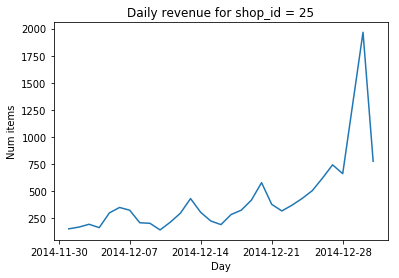

Current answer for task total_num_items_sold_var is: 117167.70229885059


In [88]:
shop_id = 25

transactions_dec = transactions[(transactions['date'] <= pd.to_datetime('31.12.2014', format="%d.%m.%Y")) & (transactions['date'] >= pd.to_datetime('01.12.2014', format="%d.%m.%Y"))]
transactions_dec = transactions_dec[['date', 'shop_id', 'item_cnt_day']]
#transactions_dec = transactions_dec.append(pd.DataFrame([[pd.to_datetime('29.12.2014', format="%d.%m.%Y"), 25, 0],], columns=['date', 'shop_id', 'item_cnt_day']))
transactions_dec = transactions_dec[transactions_dec['shop_id'] == shop_id][['date', 'item_cnt_day']].groupby('date').sum()
print(transactions_dec)

total_num_items_sold = transactions_dec['item_cnt_day'].values
days = transactions_dec.reset_index()['date'].values
print(days)

# Plot it
plt.plot(days, total_num_items_sold)
plt.ylabel('Num items')
plt.xlabel('Day')
plt.title("Daily revenue for shop_id = 25")
plt.show()

total_num_items_sold_var = transactions_dec['item_cnt_day'].var(ddof=1)